<a href="https://colab.research.google.com/github/akanksha0911/ML_clustering_GMM/blob/main/ML_Assign2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change defaults
sns.set(style='whitegrid', context='talk', palette='rainbow')

import plotly.io as pio
import plotly.express as px

pio.templates.default = 'plotly_dark'
pd.set_option('display.max_columns', None)

In [2]:
events = pd.read_csv('/content/drive/MyDrive/Kaggle_data/Football_events/events.csv')
game_info = pd.read_csv('/content/drive/MyDrive/Kaggle_data/Football_events/ginf.csv')
definitions = open('/content/drive/MyDrive/Kaggle_data/Football_events/dictionary.txt', "r").readlines()

In [3]:
game_info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [6]:
events.isna().count()

id_odsp          941009
id_event         941009
sort_order       941009
time             941009
text             941009
event_type       941009
event_type2      941009
side             941009
event_team       941009
opponent         941009
player           941009
player2          941009
player_in        941009
player_out       941009
shot_place       941009
shot_outcome     941009
is_goal          941009
location         941009
bodypart         941009
assist_method    941009
situation        941009
fast_break       941009
dtype: int64

In [7]:
events.head()


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


In [8]:
game_info.columns

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

Which teams are the best/worst in their home/away games?



By best/worst, we're talking in terms of average goal difference (home goals-away goals). This metric captures both the inclination to win and the scoring performance.


In [9]:
game_info['goal_differential_home-away']=game_info['fthg']-game_info['ftag']

home_perf=game_info.groupby('ht')['goal_differential_home-away'].mean().sort_values()
home_perf

ht
SpVgg Greuther Furth   -1.444444
US Pescara             -1.379310
Wolves                 -1.263158
Cordoba                -1.105263
Kaiserslautern         -0.944444
                          ...   
Manchester City         1.735849
Paris Saint-Germain     1.904762
Bayern Munich           2.393617
Real Madrid             2.504762
Barcelona               2.701923
Name: goal_differential_home-away, Length: 147, dtype: float64

In [10]:
away_perf=(-1*game_info.groupby('at')['goal_differential_home-away'].mean()).sort_values()
away_perf

at
Frosinone                    -1.736842
US Pescara                   -1.517241
Livorno                      -1.473684
TSV Eintracht Braunschweig   -1.470588
Cardiff                      -1.421053
                                ...   
Paris Saint-Germain           0.915094
Juventus                      0.971154
Real Madrid                   1.359223
Barcelona                     1.447619
Bayern Munich                 1.462366
Name: goal_differential_home-away, Length: 148, dtype: float64

In [ ]:
game_info

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,goal_differential_home-away
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,2
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,0
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,2
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,-1
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86,0
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66,2
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25,4
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86,0



Team similarity (KMeans)

In this section, we prepare a dataset for team performance and apply KMeans clustering.


Features are:

    On-pitch violence (yellow cards, red cards, fouls)
    Goalscoring circumstances (play situation, play location, assist method)
    Goal count

In [22]:
events['shot_outcome'].unique()

array([ 2., nan,  1.,  3.,  4.])

In [18]:
goals=events[events['shot_outcome']==1] #1 is on target

In [ ]:
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]
goals

In [20]:
teams=events[['id_odsp','event_team','event_type','location','assist_method','situation']]

In [ ]:
teams

In [ ]:
team_names=teams['event_team'].unique()
team_names

In [ ]:
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())
       +teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) #yellow_cards
yellow       

In [ ]:
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) #red_cards
red

In [ ]:
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) #fouls
foul

In [ ]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
situation

In [ ]:
location=teams.dropna().groupby('event_team')['location'].value_counts()
location

In [ ]:
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()
assist_method

In [ ]:
#The ugliest piece of code I've ever written
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l

d

In [ ]:
nb_goals=goals.groupby('event_team')['event_team'].count()
nb_goals

In [48]:
data1=pd.concat([yellow,red,foul],axis=1)
data1.columns=['yellow','red','foul']
data1

,yellow,red,foul
event_team,,,
AC Ajaccio,238,12,1593
AC Milan,502,18,2677
AJ Auxerre,89,3,558
AS Monaco,243,8,1666
AS Nancy Lorraine,160,7,1260
...,...,...,...
Villarreal,393,5,2045
Watford,130,4,725
Werder Bremen,375,10,2645


In [ ]:
data1['team']=data1.index
data1['goals']=nb_goals
data1

In [ ]:
# data.drop(['foul','red','yellow'],axis=1,inplace=True)

In [ ]:
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        data1[var+'_'+str(un[i])]=data1['team'].map(d[var][i].to_dict())
data1

In [59]:
data1.dropna(axis=1, how='all', inplace=True)
data1.fillna(0, inplace=True)


In [ ]:
data1.head()

data_gmm = data1
data_gmm #for GMM clustering

In [69]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data1.drop(['team'],axis=1))
data1['labels']=kmeans.labels_

In [ ]:
data1

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
data2 = pca.fit_transform(data1.drop('team',axis=1))

In [ ]:
data1['var_1']=data2[:,0]
data1['var_2']=data2[:,1]

In [ ]:
data1

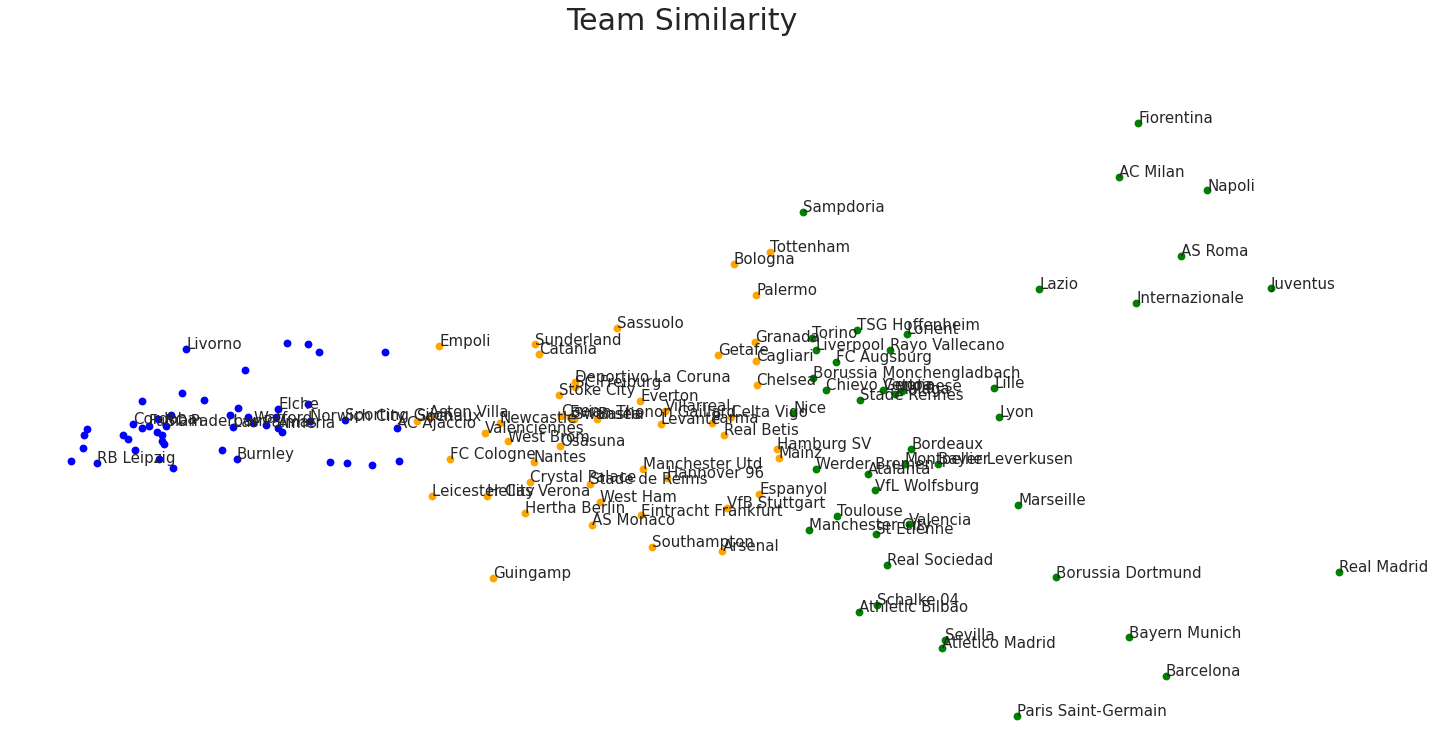

In [ ]:
col=['orange','blue','green','red','yellow']


fig, ax = plt.subplots(figsize=(25,12))

fig.suptitle('Team Similarity',fontsize=30)
for i in range (5):
    filt=data1[data1['labels']==i]
    t=filt['team'].tolist()
    ax.scatter(filt['var_1'],filt['var_2'],color=col[i],s=40)
    
    if 'Real Madrid' in t or 'Arsenal' in t:
        for j, txt in enumerate(t):
            ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)
    else:
        for j, txt in enumerate(t):
            if j%4==0:
                ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)

plt.axis('off')
plt.show()


In [ ]:
!pip install kmeans-pytorch

In [ ]:
!pip install fast-pytorch-kmeans

     |████████████████████████████████| 46 kB 1.5 MB/s 
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-py3-none-any.whl size=7088 sha256=43671c0443e667c5d2ed7ba2e96700d856d8d4b33bff53c54bff57aeb7fddf96
  Stored in directory: /root/.cache/pip/wheels/90/1c/31/71496b1753c1ca617185f8ef5e4fbb77a9d36facf5eb73b352
Successfully built fast-pytorch-kmeans


In [ ]:
data1

,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,1,-612.944316,0.337558
AC Milan,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,2,1762.349408,294.421091
AJ Auxerre,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,1,-1379.506754,-17.629958
AS Monaco,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,28.958730,-112.015787
AS Nancy Lorraine,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,1,-651.201928,89.047394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,269.273210,20.167920
Watford,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,1,-1085.416544,6.492093
Werder Bremen,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,2,766.381832,-47.013505


In [ ]:
!pip install kmeans-pytorch


In [ ]:
import torch

from kmeans_pytorch import kmeans, kmeans_predict
test_data = data1.drop(['team'],axis=1)

test_data


,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,1,-612.944316,0.337558
AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,2,1762.349408,294.421091
AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,1,-1379.506754,-17.629958
AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,28.958730,-112.015787
AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,1,-651.201928,89.047394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,269.273210,20.167920
Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,1,-1085.416544,6.492093
Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,2,766.381832,-47.013505


In [ ]:
x = torch.tensor(test_data.to_numpy())
x

tensor([[ 1.1000e+02,  9.1300e+02,  7.4000e+01,  ...,  1.0000e+00,
         -6.1294e+02,  3.3756e-01],
        [ 3.2000e+02,  2.6150e+03,  2.1900e+02,  ...,  2.0000e+00,
          1.7623e+03,  2.9442e+02],
        [ 4.6000e+01,  3.6400e+02,  4.1000e+01,  ...,  1.0000e+00,
         -1.3795e+03, -1.7630e+01],
        ...,
        [ 2.4900e+02,  1.9120e+03,  2.0800e+02,  ...,  2.0000e+00,
          7.6638e+02, -4.7014e+01],
        [ 1.3400e+02,  1.1830e+03,  1.4500e+02,  ...,  0.0000e+00,
         -2.4799e+02, -1.5011e+01],
        [ 1.6700e+02,  1.4080e+03,  1.5200e+02,  ...,  0.0000e+00,
          5.6355e+01, -8.5915e+01]], dtype=torch.float64)

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')


In [ ]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=3, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 4it [00:00, 40.84it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [ ]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2,
        2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0,
        2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2,
        0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0,
        1, 0, 2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1,
        1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0])
tensor([[ 1.6815e+02,  1.4471e+03,  1.3650e+02,  3.9188e+01,  8.8083e+01,
          1.4229e+02,  7.0183e+02,  5.2179e+02,  1.3652e+02,  5.0000e+01,
          1.4667e+01,  1.4896e+01,  1.8938e+01,  1.6896e+01,  2.5812e+01,
          2.5896e+01,  1.0917e+01,  1.1125e+01,  1.7333e+01,  1.9583e+00,
          8.0517e+02,  4.6825e+02,  3.2671e+02,  6.0104e+01,  5.0646e+01,
          0.0000e+00,  1.1088e+02, -5.6473e-01],
        [ 2.9843e+02,  2.2541e+03,  2.1048e+02,  6.3682e+01,  1.2866e+02,
          2.2480e+02,  1.0668e+0

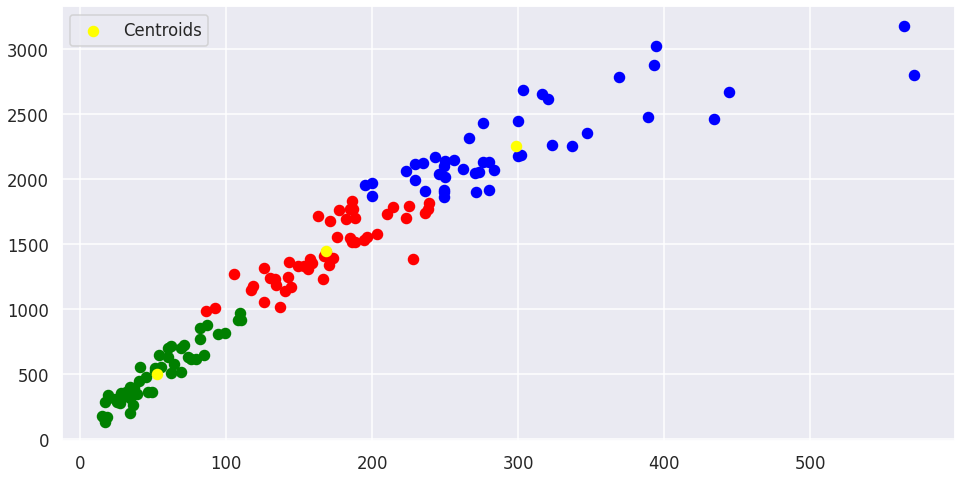

In [ ]:

sns.set_style("darkgrid")
plt.figure(figsize = (16,8))
plt.scatter(x[cluster_ids_x == 0, 0], x[cluster_ids_x == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[cluster_ids_x == 1, 0], x[cluster_ids_x == 1, 1], 
            s = 100, c = 'blue')
plt.scatter(x[cluster_ids_x == 2, 0], x[cluster_ids_x == 2, 1],
            s = 100, c = 'green')


# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**GMM**

In [81]:
data_gmm

,yellow,red,foul,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0
AC Milan,502,18,2677,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,1
AJ Auxerre,89,3,558,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,2
AS Monaco,243,8,1666,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0
Watford,130,4,725,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,2
Werder Bremen,375,10,2645,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,1


In [ ]:
fig2 = px.scatter_3d(data_gmm, x="yellow", y="red",z="foul",
                     color="team",size="goals")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [73]:
import sklearn.mixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)


In [78]:
gmm.fit(data_gmm.drop(['team'],axis=1))

GaussianMixture(n_components=4)

In [79]:
labels = gmm.predict(data_gmm.drop(['team'],axis=1))
